### Data Preprocessing 

In [138]:
import pandas as pd
import numpy as  np

In [139]:
#load the dataset
houses = pd.read_csv('Data/listings.csv')
houses.columns


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [140]:
houses.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.94762,18.47599,Entire home/apt,783.0,3,79,2024-06-18,0.56,1,11,4,NaN
1,15007,Blaauwberg House on the beach in Bloubergstrand,59072,Dirk,NaN,Ward 23,-33.80001,18.46063,Entire home/apt,6550.0,2,47,2024-10-19,0.35,3,46,2,NaN
2,15068,Grande Bay,59318,Linda,NaN,Ward 23,-33.78826,18.45940,Entire home/apt,3000.0,4,0,NaN,NaN,6,356,0,NaN


In [141]:
#Describe the dataset
houses.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.581600e+04,2.581600e+04,0.0,25816.000000,25816.000000,21510.000000,25816.000000,25816.000000,19458.000000,25816.000000,25816.000000,25816.000000
mean,5.871331e+17,2.040918e+08,NaN,-33.955590,18.472027,4404.111018,4.396266,23.116478,0.932417,12.844670,200.388325,6.119654
std,5.316011e+17,2.000484e+08,NaN,0.098417,0.124090,9540.179791,20.776909,46.209194,1.091803,28.473072,129.645580,10.544251
min,3.191000e+03,3.754000e+03,NaN,-34.262840,18.318968,144.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,3.258190e+07,3.491403e+07,NaN,-34.014930,18.400966,1200.000000,1.000000,1.000000,0.180000,1.000000,75.000000,0.000000
50%,7.337961e+17,1.160514e+08,NaN,-33.927548,18.425413,2129.000000,2.000000,5.000000,0.570000,2.000000,238.000000,2.000000
75%,1.086186e+18,3.707272e+08,NaN,-33.910028,18.482063,4071.000000,3.000000,24.000000,1.260000,8.000000,320.000000,8.000000
max,1.320402e+18,6.688190e+08,NaN,-33.572180,18.936030,273736.000000,999.000000,798.000000,22.650000,175.000000,365.000000,154.000000


In [142]:
#info about the dataset
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25816 entries, 0 to 25815
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              25816 non-null  int64  
 1   name                            25815 non-null  object 
 2   host_id                         25816 non-null  int64  
 3   host_name                       25745 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   25816 non-null  object 
 6   latitude                        25816 non-null  float64
 7   longitude                       25816 non-null  float64
 8   room_type                       25816 non-null  object 
 9   price                           21510 non-null  float64
 10  minimum_nights                  25816 non-null  int64  
 11  number_of_reviews               25816 non-null  int64  
 12  last_review                     

From the output displayed above, a few observations can be made :

1. There are 18 columns in this dataset
2. They include both integers and objects(numbers and strings)
3. Some columns have null values - further exploarion will be done to determine the best approach to handle the null values


#### Check for missing values

In [143]:
#check for missing values in percentages
houses.isnull().sum()/len(houses)*100

id                                  0.000000
name                                0.003874
host_id                             0.000000
host_name                           0.275023
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                              16.679579
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        24.628138
reviews_per_month                  24.628138
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                            99.674620
dtype: float64

The output above shows the percentages of the columns with missing values. 
1. All the rows in the neighbourhood_group column have null values
2. The Name column has some few missing values in the column ~ 0.03
3. Host name column has 27% of the rows with missing values
4. Price has 16% of its rows with missing values
5. Last review and reviews_per_month  columns have ~25% null values in their rows
6. The last column has nearly 99% of it rows with missing values

For columns that have missing values with more than 50% of their values missing will be dropped.
The columns whose missing values are below @5% will be imputed with either the mean, median or mode
and those with less thab 10%, their rows will be dropped as this will not affect the dataset 




In [144]:
#drop column neighbourhood_group
houses.drop(columns="neighbourhood_group", inplace=True)


In [145]:
houses.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm', 'license'],
      dtype='object')

In [146]:
#drop the license column 
houses.drop(columns="license", inplace=True)

In [147]:
#check for the columns with missing values but less than 10%
houses.columns[houses.isnull().sum() > 0 ]


Index(['name', 'host_name', 'price', 'last_review', 'reviews_per_month'], dtype='object')

In [152]:
#Drop the rows in the name column  and host_name with missing values
houses = houses.dropna(subset=["name", "host_name"])



In [156]:
#check the name column for missing values
houses["name"].isnull().sum()

0

In [157]:
#check for missing values in percentages
houses.isnull().sum()/len(houses)*100

id                                 0.000000
name                               0.000000
host_id                            0.000000
host_name                          0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                             16.722343
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       24.662057
reviews_per_month                 24.662057
calculated_host_listings_count     0.000000
availability_365                   0.000000
number_of_reviews_ltm              0.000000
dtype: float64

In [158]:
#fill the missing values in the reviews_per_month column with the mean
houses["reviews_per_month"].fillna(houses["reviews_per_month"].mean(), inplace=True)

In [159]:
#fill the missing values in the price column with the median
houses["price"].fillna(houses["price"].median(), inplace=True)

In [160]:
#check for missing values
houses.isnull().sum()

id                                   0
name                                 0
host_id                              0
host_name                            0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       6349
reviews_per_month                    0
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

On inspecting the last_review column, I identified that the values are dates, hence it is imperative to change the datatypes to a datetype datatype

In [161]:
# convert the object datatype to datetime datatype
houses["last_review"] = pd.to_datetime(houses["last_review"])
houses["last_review"].dtype

dtype('<M8[ns]')

In [162]:
houses.head(3)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,3191,Malleson Garden Cottage,3754,Brigitte,Ward 57,-33.94762,18.47599,Entire home/apt,783.0,3,79,2024-06-18,0.560000,1,11,4
1,15007,Blaauwberg House on the beach in Bloubergstrand,59072,Dirk,Ward 23,-33.80001,18.46063,Entire home/apt,6550.0,2,47,2024-10-19,0.350000,3,46,2
2,15068,Grande Bay,59318,Linda,Ward 23,-33.78826,18.45940,Entire home/apt,3000.0,4,0,NaT,0.929517,6,356,0


The necessary column have been successfully converted:

- The **last_review** column has been changed from an `object` to a `datetime` data type.

#### Outcome:
- **last_review**: Now properly recognized as a `datetime` type, enabling date-based analysis and operations.

In [168]:
houses.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,2.574400e+04,2.574400e+04,25744.000000,25744.000000,25744.000000,25744.000000,25744.000000,19395,25744.000000,25744.000000,25744.000000,25744.000000
mean,5.871181e+17,2.046003e+08,-33.955664,18.472204,4020.521481,4.400598,23.027152,2024-03-28 19:30:24.779582464,0.929517,12.720012,200.242115,6.096683
min,3.191000e+03,3.754000e+03,-34.262840,18.318968,144.000000,1.000000,0.000000,2014-11-17 00:00:00,0.010000,1.000000,0.000000,0.000000
25%,3.258016e+07,3.551456e+07,-34.015152,18.400970,1380.000000,1.000000,1.000000,2024-02-12 00:00:00,0.280000,1.000000,75.000000,0.000000
50%,7.340684e+17,1.166616e+08,-33.927607,18.425582,2119.000000,2.000000,5.000000,2024-11-04 00:00:00,0.929517,2.000000,238.000000,2.000000
75%,1.086201e+18,3.717659e+08,-33.910020,18.482248,3500.000000,3.000000,24.000000,2024-12-11 00:00:00,1.000000,8.000000,320.000000,8.000000
max,1.320402e+18,6.688190e+08,-33.572180,18.936030,273736.000000,999.000000,798.000000,2024-12-28 00:00:00,22.650000,175.000000,365.000000,154.000000
std,5.315854e+17,2.000841e+08,0.098525,0.124214,8759.278863,20.805062,46.164414,NaN,0.946912,28.397889,129.684521,10.532596


In [163]:
#check for duplicate values
houses.duplicated().sum()

0

For the **last_review** column I will impute with statistical methods - the mode. 


In [169]:
mode_date = houses['last_review'].mode()
houses['last_review'].fillna(mode_date, inplace=True)

There are no duplicate values in this dataset


In [170]:
#check for the unique values
houses.nunique()

id                                25744
name                              24945
host_id                           13615
host_name                          5398
neighbourhood                        84
latitude                          18797
longitude                         18234
room_type                             4
price                              5139
minimum_nights                       58
number_of_reviews                   366
last_review                        1557
reviews_per_month                   604
calculated_host_listings_count       65
availability_365                    366
number_of_reviews_ltm               101
dtype: int64

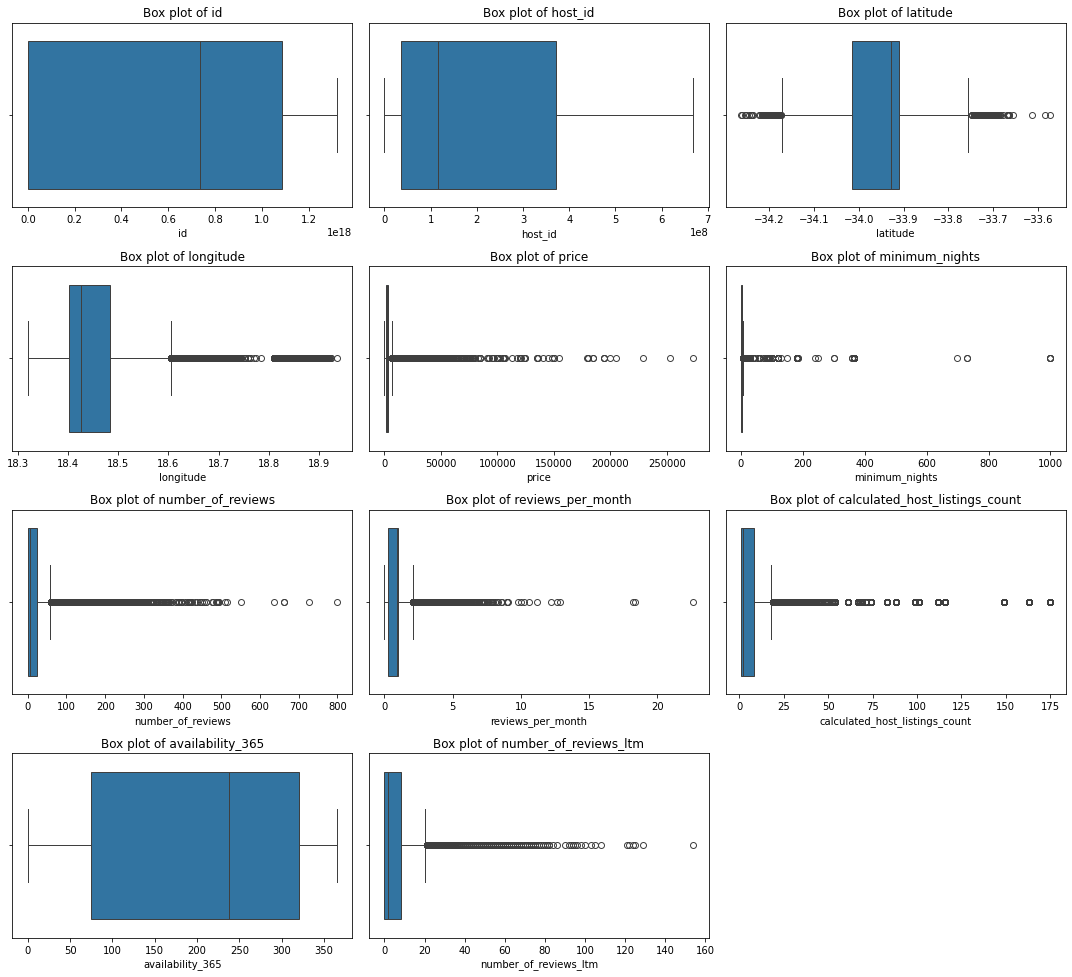

In [167]:
#check for outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plots
plt.figure(figsize=(15, 20))

# Loop through each numerical column and create a box plot
for i, column in enumerate(houses.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(len(houses.columns) // 3 + 1, 3, i)
    sns.boxplot(x=houses[column])
    plt.title(f'Box plot of {column}')
    plt.tight_layout()

plt.show()

From the box plots above many of the features have outliers, but intuitively choose to keep them to see how the model will perform with the outliers first, before proceeding to remove them

## Exploratory Data Analysis

### Univariate Analysis

In [174]:
# Summary statistics for numeric features
summary_stats = houses.describe()
print(summary_stats)

# Summary statistics for categorical features
categorical_features = [feature for feature in houses.columns if houses[feature].dtype == 'object']
for feature in categorical_features:
    print(f"\n{feature}:\n{houses[feature].value_counts()}")



                 id       host_id      latitude     longitude          price  \
count  2.574400e+04  2.574400e+04  25744.000000  25744.000000   25744.000000   
mean   5.871181e+17  2.046003e+08    -33.955664     18.472204    4020.521481   
min    3.191000e+03  3.754000e+03    -34.262840     18.318968     144.000000   
25%    3.258016e+07  3.551456e+07    -34.015152     18.400970    1380.000000   
50%    7.340684e+17  1.166616e+08    -33.927607     18.425582    2119.000000   
75%    1.086201e+18  3.717659e+08    -33.910020     18.482248    3500.000000   
max    1.320402e+18  6.688190e+08    -33.572180     18.936030  273736.000000   
std    5.315854e+17  2.000841e+08      0.098525      0.124214    8759.278863   

       minimum_nights  number_of_reviews                    last_review  \
count    25744.000000       25744.000000                          19395   
mean         4.400598          23.027152  2024-03-28 19:30:24.779582464   
min          1.000000           0.000000            20

In [175]:
#columns with datatype numeric
numeric_columns = houses.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

### Visualize the numerical features

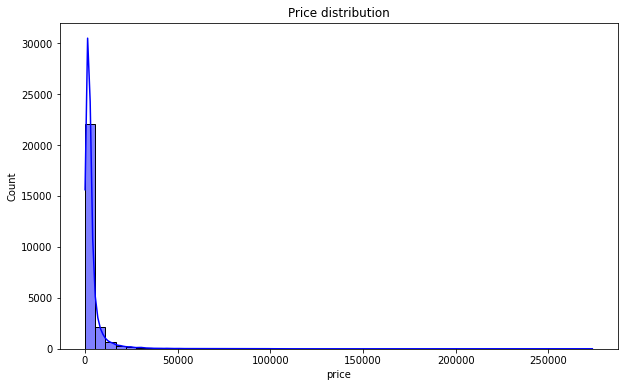

In [176]:
#price column distribution 
plt.figure(figsize=(10, 6))
sns.histplot(houses['price'], kde=True,bins=50, color='blue')
plt.title('Price distribution')
plt.show()


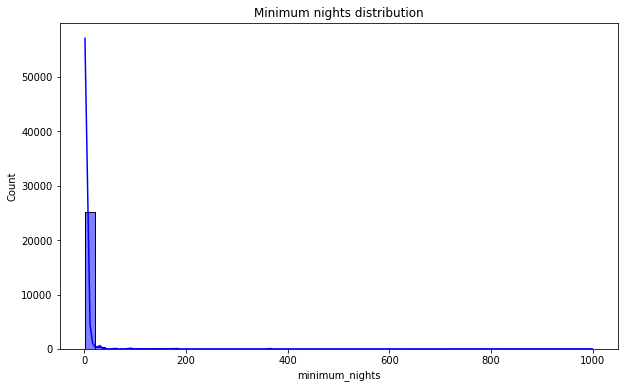

In [177]:
#minimum nights 
plt.figure(figsize=(10, 6))
sns.histplot(houses['minimum_nights'], kde=True,bins=50, color='blue')
plt.title('Minimum nights distribution')
plt.show()


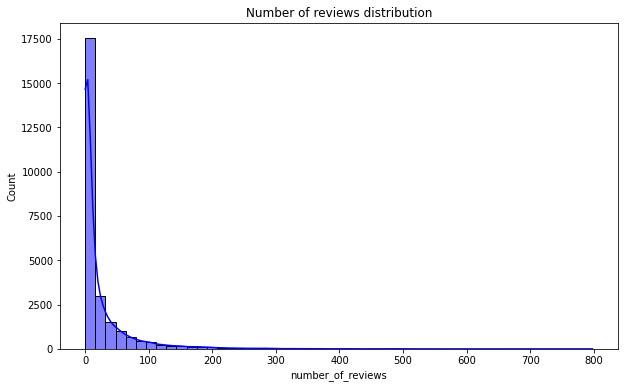

In [178]:
#number of reviews
plt.figure(figsize=(10, 6))
sns.histplot(houses['number_of_reviews'], kde=True,bins=50, color='blue')
plt.title('Number of reviews distribution')
plt.show()

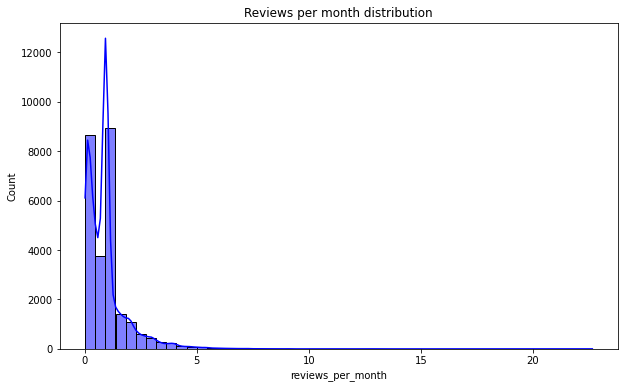

In [179]:
#reviews per month calculated host listings count
plt.figure(figsize=(10, 6))
sns.histplot(houses['reviews_per_month'], kde=True,bins=50, color='blue')
plt.title('Reviews per month distribution')
plt.show()


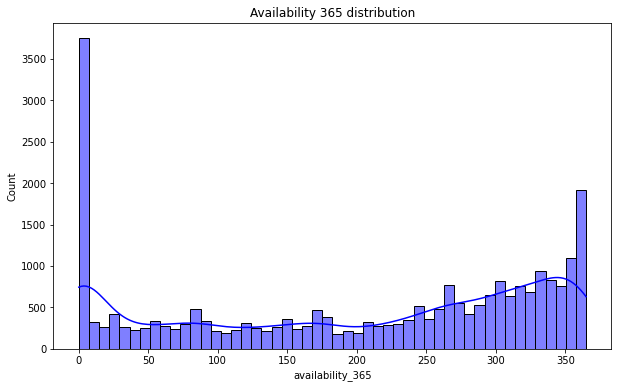

In [180]:
#availability_365
plt.figure(figsize=(10, 6))
sns.histplot(houses['availability_365'], kde=True,bins=50, color='blue')
plt.title('Availability 365 distribution')
plt.show()

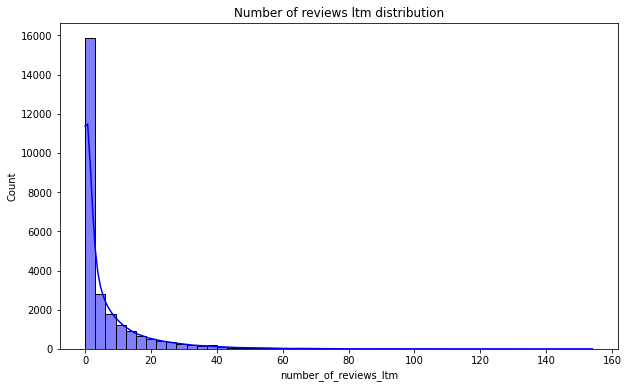

In [181]:
#number of reviews ltm
plt.figure(figsize=(10, 6))
sns.histplot(houses['number_of_reviews_ltm'], kde=True,bins=50, color='blue')
plt.title('Number of reviews ltm distribution')
plt.show()



#### Univariate analysis for categorical columns


In [182]:
#categorical columns
houses.select_dtypes(include=['object']).columns

Index(['name', 'host_name', 'neighbourhood', 'room_type'], dtype='object')

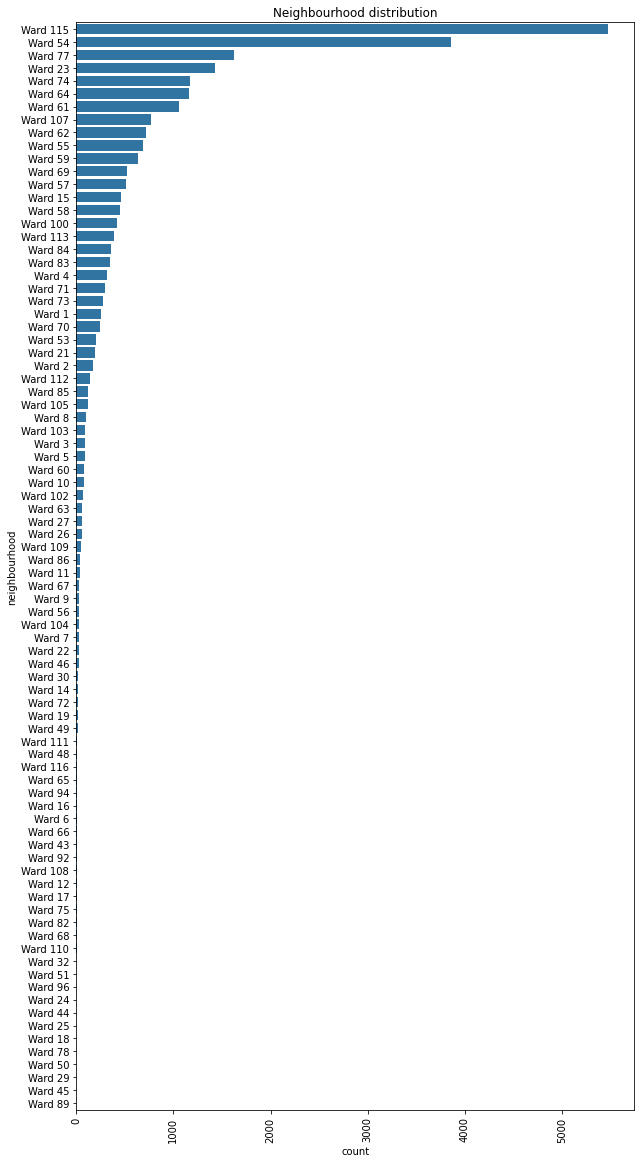

In [186]:
#neighbourhood column
plt.figure(figsize=(10, 20))
sns.countplot(houses['neighbourhood'], order = houses['neighbourhood'].value_counts().index)    
plt.xticks(rotation=90)
plt.title('Neighbourhood distribution')
plt.show()


room_type
Entire home/apt    21234
Private room        4366
Hotel room           127
Shared room           17
Name: count, dtype: int64


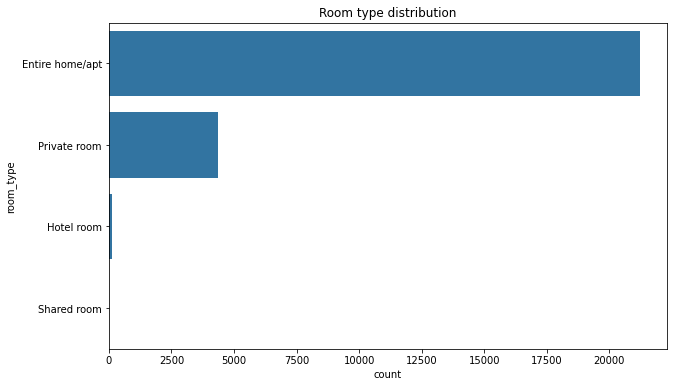

In [188]:
#count the roomtypes
print(houses['room_type'].value_counts())

#Roomtype distribution 
plt.figure(figsize=(10, 6))
sns.countplot(houses['room_type'], order = houses['room_type'].value_counts().index)
plt.title('Room type distribution')
plt.show()


### Bivariate Analysis

Numerical vs numerical

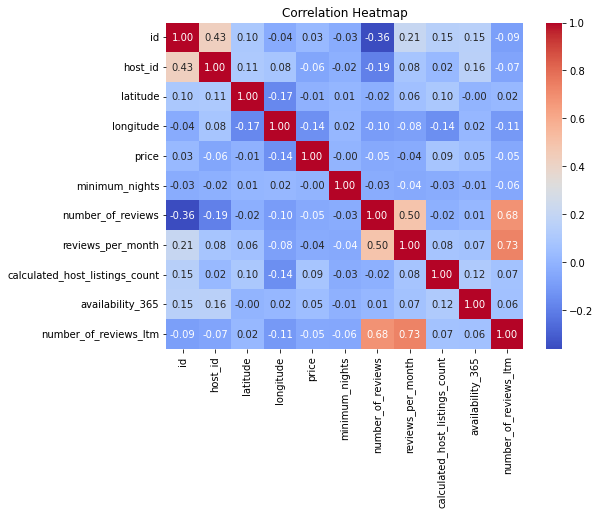

In [189]:

# Compute correlation matrix
correlation_matrix = houses.corr(numeric_only=True)

# Heatmap visualization
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


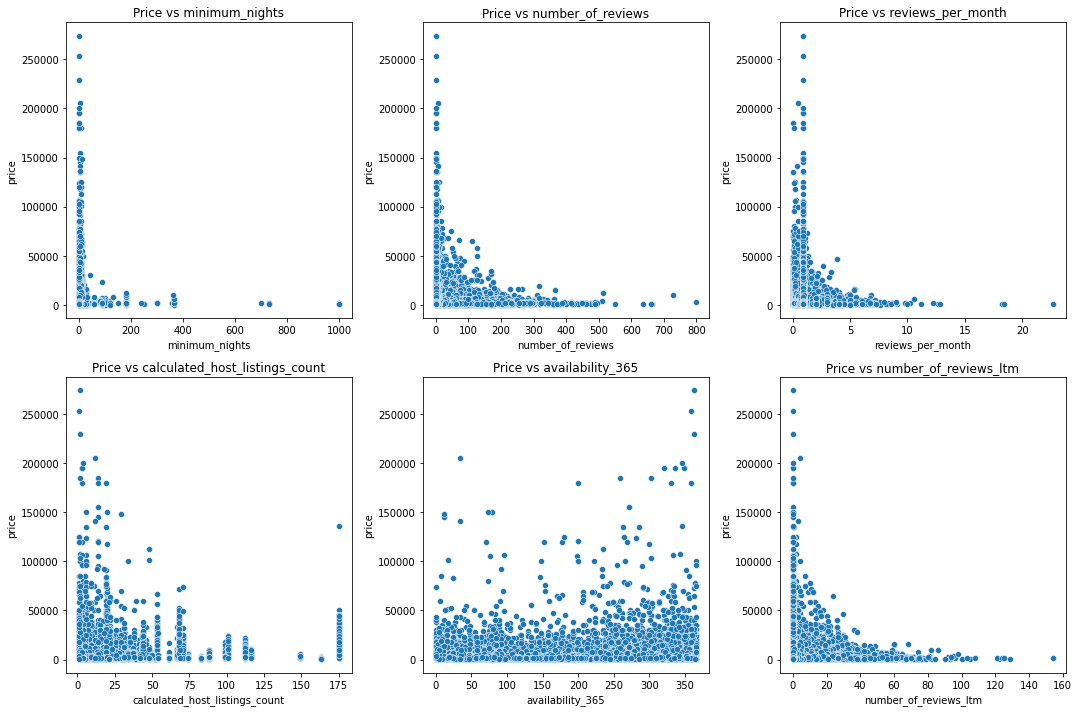

In [193]:
# Variables to compare with price
features = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 
            'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']

# Create subplots: 2 rows, 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjust layout

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through features and create scatter plots
for i, feature in enumerate(features):
    sns.scatterplot(x=houses[feature], y=houses['price'], ax=axes[i])
    axes[i].set_title(f"Price vs {feature}")

plt.tight_layout()  # Adjust spacing
plt.show()

### Categorical vs. Numerical (Comparing Price Across Room Types)

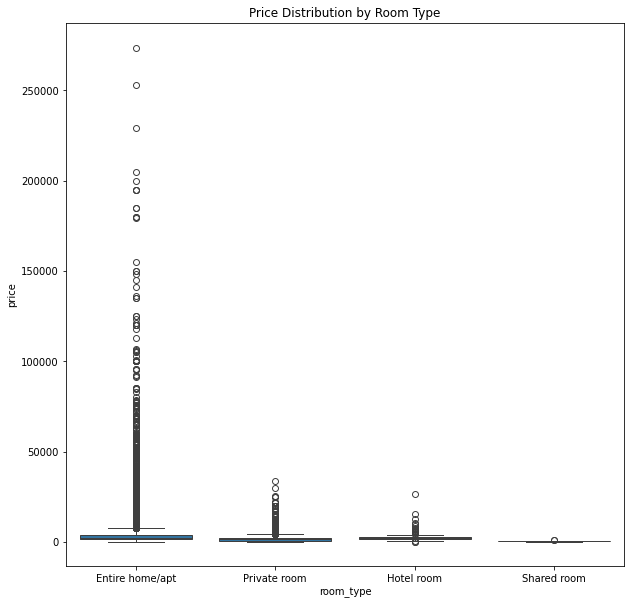

In [199]:
plt.figure(figsize=(10,10))
sns.boxplot(x=houses["room_type"], y=houses["price"])
plt.title("Price Distribution by Room Type")
plt.xticks()
plt.show()


### Group Statistics for room_type


In [198]:
houses.groupby("room_type")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,21234.0,4487.724451,9529.465570,200.0,1542.25,2119.0,4000.0,273736.0
Hotel room,127.0,2933.881890,3160.021794,220.0,1668.50,2119.0,2598.5,26775.0
Private room,4366.0,1793.566193,2088.566841,144.0,706.00,1500.0,2119.0,33500.0
Shared room,17.0,508.882353,266.307595,240.0,323.00,440.0,600.0,1140.0


### Categorical vs. Categorical (Chi-Square Test)

In [200]:
import scipy.stats as stats

contingency_table = pd.crosstab(houses["room_type"], houses["neighbourhood"])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Test: p-value = {p}")


Chi-Square Test: p-value = 1.6493623256302897e-307


If p < 0.05, room type and neighborhood are statistically dependent.

### Time-Based Analysis (Price Over Time)

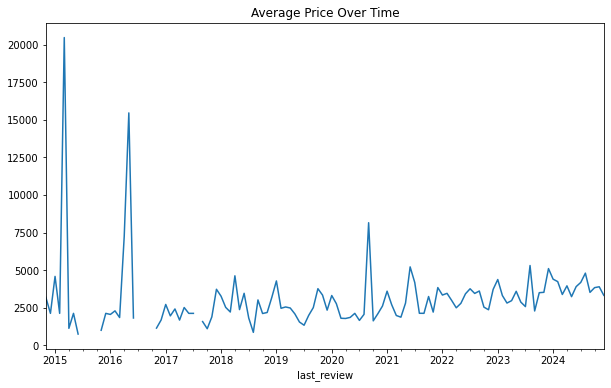

In [202]:


# Group by month and get average price
plt.figure(figsize=(10,6))
houses.set_index('last_review').resample('M')['price'].mean().plot()
plt.title("Average Price Over Time")
plt.show()
